In [10]:
import nibabel as nib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pyvis.network import Network
import pandas as pd

In [2]:
# Replace 'your_file.pconn.nii' with the path to your .pconn.nii file
file_path = 'BSNIP\pconn\S0009QPW3.pconn.nii'

# Load the .pconn.nii file
img = nib.load(file_path)

# Extract the data array from the image
# The data might need to be processed or reshaped depending on its structure
data = img.get_fdata()

# Check the shape of the data to understand its structure
print("Data shape:", data.shape)


Data shape: (718, 718)


In [11]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,708,709,710,711,712,713,714,715,716,717
0,1.000000,0.079518,0.252168,0.646706,0.571479,-0.059349,-0.349579,0.024457,0.265783,-0.153379,...,-0.155973,0.320235,0.366281,-0.439612,-0.273289,-0.291572,0.179596,-0.119430,-0.228202,-0.062026
1,0.079518,1.000000,-0.009088,0.111411,0.187420,-0.123904,0.167171,0.140766,0.090412,0.085333,...,-0.036039,-0.007379,0.119761,0.132242,-0.125090,-0.098400,0.276918,0.140211,-0.084484,0.092032
2,0.252168,-0.009088,1.000000,0.531847,0.257097,0.722612,-0.125043,0.047114,0.239331,0.036684,...,0.283147,0.014328,0.021688,-0.098918,0.446860,0.059613,-0.062181,-0.204540,0.193451,-0.010901
3,0.646706,0.111411,0.531847,1.000000,0.598060,0.225556,-0.033804,0.144010,0.325565,0.140085,...,0.102146,-0.072594,0.088038,0.075690,0.051366,-0.054430,-0.036239,-0.247300,0.000980,-0.105123
4,0.571479,0.187420,0.257097,0.598060,1.000000,-0.073712,-0.191568,-0.028305,0.584847,0.139071,...,-0.323016,-0.042276,-0.004051,-0.216524,-0.209634,-0.179115,-0.042929,-0.182028,-0.200388,0.083900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-0.291572,-0.098400,0.059613,-0.054430,-0.179115,0.188699,0.022078,0.263717,-0.035913,0.197971,...,-0.018829,0.095517,0.218812,0.211994,0.182512,1.000000,0.023409,0.205665,0.105377,0.204636
714,0.179596,0.276918,-0.062181,-0.036239,-0.042929,-0.205784,-0.235766,0.053291,-0.161138,-0.203942,...,-0.438017,0.327530,0.520602,-0.334406,-0.257735,0.023409,1.000000,0.295047,-0.183362,-0.321078
715,-0.119430,0.140211,-0.204540,-0.247300,-0.182028,-0.229096,-0.023153,0.014176,-0.345708,-0.206546,...,-0.218642,0.132706,0.370423,-0.131089,0.037282,0.205665,0.295047,1.000000,-0.069655,0.145119
716,-0.228202,-0.084484,0.193451,0.000980,-0.200388,0.211348,-0.009776,-0.122196,-0.182679,0.045826,...,0.336713,-0.176929,-0.025120,0.311436,0.166642,0.105377,-0.183362,-0.069655,1.000000,-0.061033


Number of nodes: 718
Number of edges: 13807


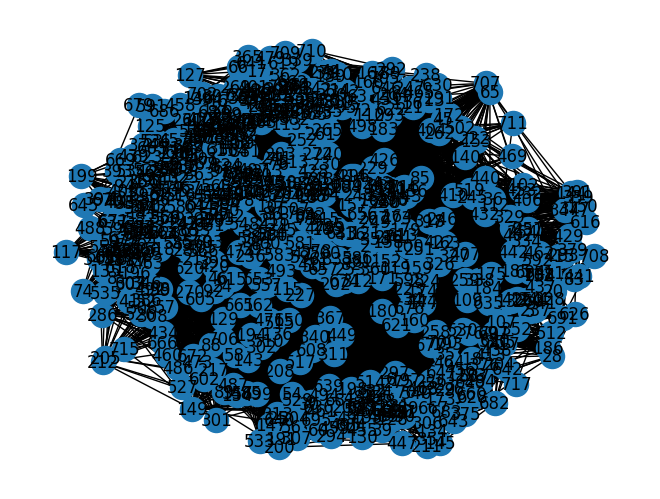

In [14]:
# Create a graph from the data
# This example assumes 'data' is a square matrix where data[i][j] represents the connection
# strength between region i and region j. Your data's structure may vary.
G = nx.Graph()

# Add nodes with the brain region names or indices if you don't have names
num_regions = data.shape[0]
G.add_nodes_from(range(num_regions))

# Add edges based on connectivity data
# Here we're simply adding an edge for every non-zero connection
for i in range(num_regions):
    # Calculate the standard deviation of the specified row
    std_dev = df.iloc[i].std()
    threshold = 2*std_dev
    for j in range(i+1, num_regions):  # Ensure i < j to avoid duplicating edges
        if abs(data[i, j]) > threshold:  # Assuming 0 means no connection
            G.add_edge(i, j, weight=data[i, j])

# Now you can analyze the graph with networkx functions
# For example, print the number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# You can also visualize the graph using matplotlib or similar libraries
# This step requires matplotlib to be installed (`pip install matplotlib`)
nx.draw(G, with_labels=True)
plt.show()